In [128]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import joblib
import seaborn as sb

In [ ]:
df = pd.read_csv('housing.csv')


In [130]:
df.drop(columns=['id','date'],inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [131]:
df['waterfront'].sample(10)

10021    N
3909     N
10949    N
20858    N
6535     N
17803    N
16706    N
1903     N
16964    N
10226    N
Name: waterfront, dtype: object

**Feature Engg**

In [132]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [133]:
df.duplicated().sum()

np.int64(5)

***feature Spiliting***

In [134]:
numeric_features = [
    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',  
    'view', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 
    'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15'
]

In [135]:
categ_features = ['zipcode','condition','waterfront']

In [136]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,N,0,Average,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,N,0,Average,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,N,0,Average,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,N,0,Very Good,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,N,0,Average,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [137]:
df = df[df['bedrooms'] > 0].reset_index(drop=True)
df['bathrooms'] =df['bathrooms'].fillna(df['bathrooms'].median())

In [138]:
df['Houseage'] = 2025 - df['yr_built']
df['TotalSqft'] = df['sqft_above' ] + df['sqft_basement']
df['Renovated'] = df['yr_renovated'] > 0 
df['BathByBed'] = df['bathrooms'] / df['bedrooms']
df['FloorPerSqft'] = df['sqft_living'] /df['floors']


In [139]:
df['TotalSqft'].describe()

count    21600.000000
mean      2080.123657
std        918.196482
min        370.000000
25%       1429.250000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: TotalSqft, dtype: float64

***outlier detection*** 

<Axes: xlabel='TotalSqft', ylabel='Count'>

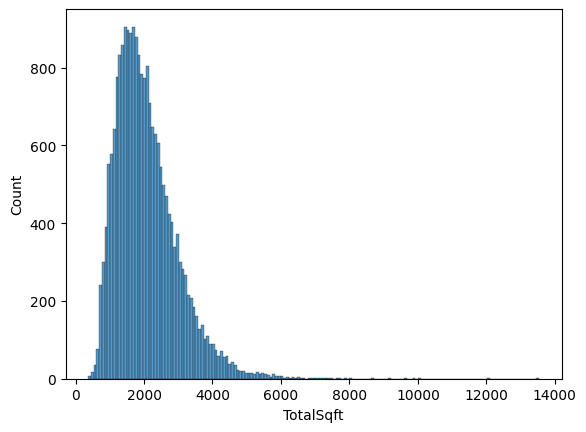

In [140]:
sb.histplot(df['TotalSqft'])

<Axes: ylabel='TotalSqft'>

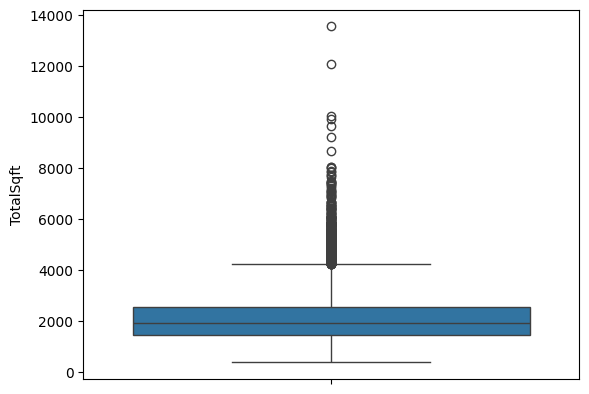

In [141]:
sb.boxplot(df['TotalSqft'])

In [142]:

upplimit = df['TotalSqft'].quantile(0.99)
lowelimit = df['TotalSqft'].quantile(0.01)

print(upplimit,lowelimit)

4980.0 720.0


In [143]:
newdf = df[(df['TotalSqft'] <= 4980) & (df['TotalSqft'] > 720)]
newdf.shape

(21138, 24)

In [144]:
newdf['TotalSqft'].describe()

count    21138.000000
mean      2057.274577
std        818.831080
min        730.000000
25%       1440.000000
50%       1920.000000
75%       2530.000000
max       4980.000000
Name: TotalSqft, dtype: float64

<Axes: ylabel='TotalSqft'>

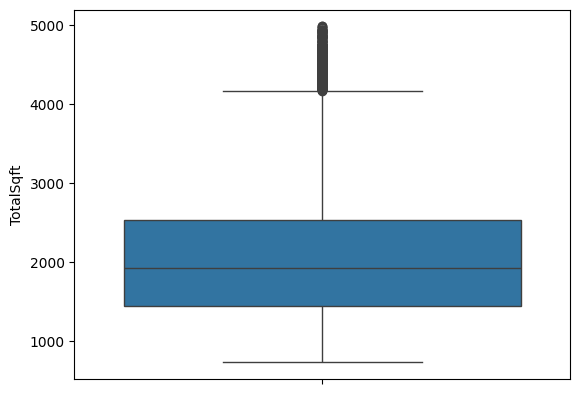

In [145]:
sb.boxplot(newdf['TotalSqft'])

In [146]:
numeric_features += ['Houseage','TotalSqft','BathByBed','FloorPerSqft']
categ_features +=['Renovated']

In [147]:
x = df.drop(columns=['price'])
y = df['price']

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [149]:
x_train.shape ,x_test.shape

((17280, 23), (4320, 23))

In [ ]:
# no missing values preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', Pipeline(steps=[('scaler', StandardScaler())]), numeric_features),
        ('categor', Pipeline(steps=[('ohe', OneHotEncoder(drop='first', handle_unknown='ignore'))]), categ_features)
    ],
    remainder='passthrough'
)

In [151]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
print(pipeline.steps)

[('preprocessor', ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['bedrooms', 'bathrooms', 'sqft_living',
                                  'sqft_lot', 'floors', 'view', 'grade',
                                  'sqft_above', 'sqft_basement', 'yr_built',
                                  'yr_renovated', 'lat', 'long',
                                  'sqft_living15', 'sqft_lot15', 'Houseage',
                                  'TotalSqft', 'BathByBed', 'FloorPerSqft']),
                                ('categor',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['zipcode', 'condition', 'waterfront',
                          

In [152]:
pipeline.fit(x_train,y_train)


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categor', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [153]:
ypred = pipeline.predict(x_test)

In [154]:
print("R²:", r2_score(y_test, ypred))
print("Mean Sq err : ",mean_squared_error(y_test, ypred))

R²: 0.8107956066285554
Mean Sq err :  25716245964.85273
